In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [2]:
Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [4]:
print(titanic.shape)
titanic.columns

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

In [5]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin E mbarked  
0      0         A/5 21171   7.2500   NaN         S  
1      0          PC 17599  71.2833   C85         C  
2      0  STON/O2. 3101282   7.9250   NaN         S  
3      0            113803  53.1000  C123         S  
4      0            373450   8.0500   NaN         S

In [6]:
titanic['Sex'].replace({'male':1,'female':0}, inplace=True)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

In [8]:
df = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

### Imputing Missing Age Data using KNNImputer

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [10]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

### Dummy Encoding Pclass feature 

In [11]:
a = pd.get_dummies(df.Pclass, prefix='Pclass')

In [12]:
df = pd.concat([df,a],axis=1)

In [13]:
df.drop('Pclass', axis=1, inplace=True)

In [14]:
df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_1.0',
       'Pclass_2.0', 'Pclass_3.0'],
      dtype='object')

### Data Partitioning

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=100, stratify=y)

### Building a Decision Tree Model

In [17]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# Checking Classifier score

In [19]:
clf.score(x_test,y_test)

0.820627802690583

### checking cross validation score to check generalization

In [20]:
scores = cross_val_score(clf,x_train,y_train, cv=5,scoring='f1_macro')
scores.mean()

0.741874606925932

In [21]:
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

#### From the train and test scores we can see that the model has overfitted the training data

In [22]:
f1_score(train_predictions, y_train)

0.9800796812749004

In [23]:
f1_score(test_predictions, y_test)

0.7802197802197802

### Visualizing the Overfitted model

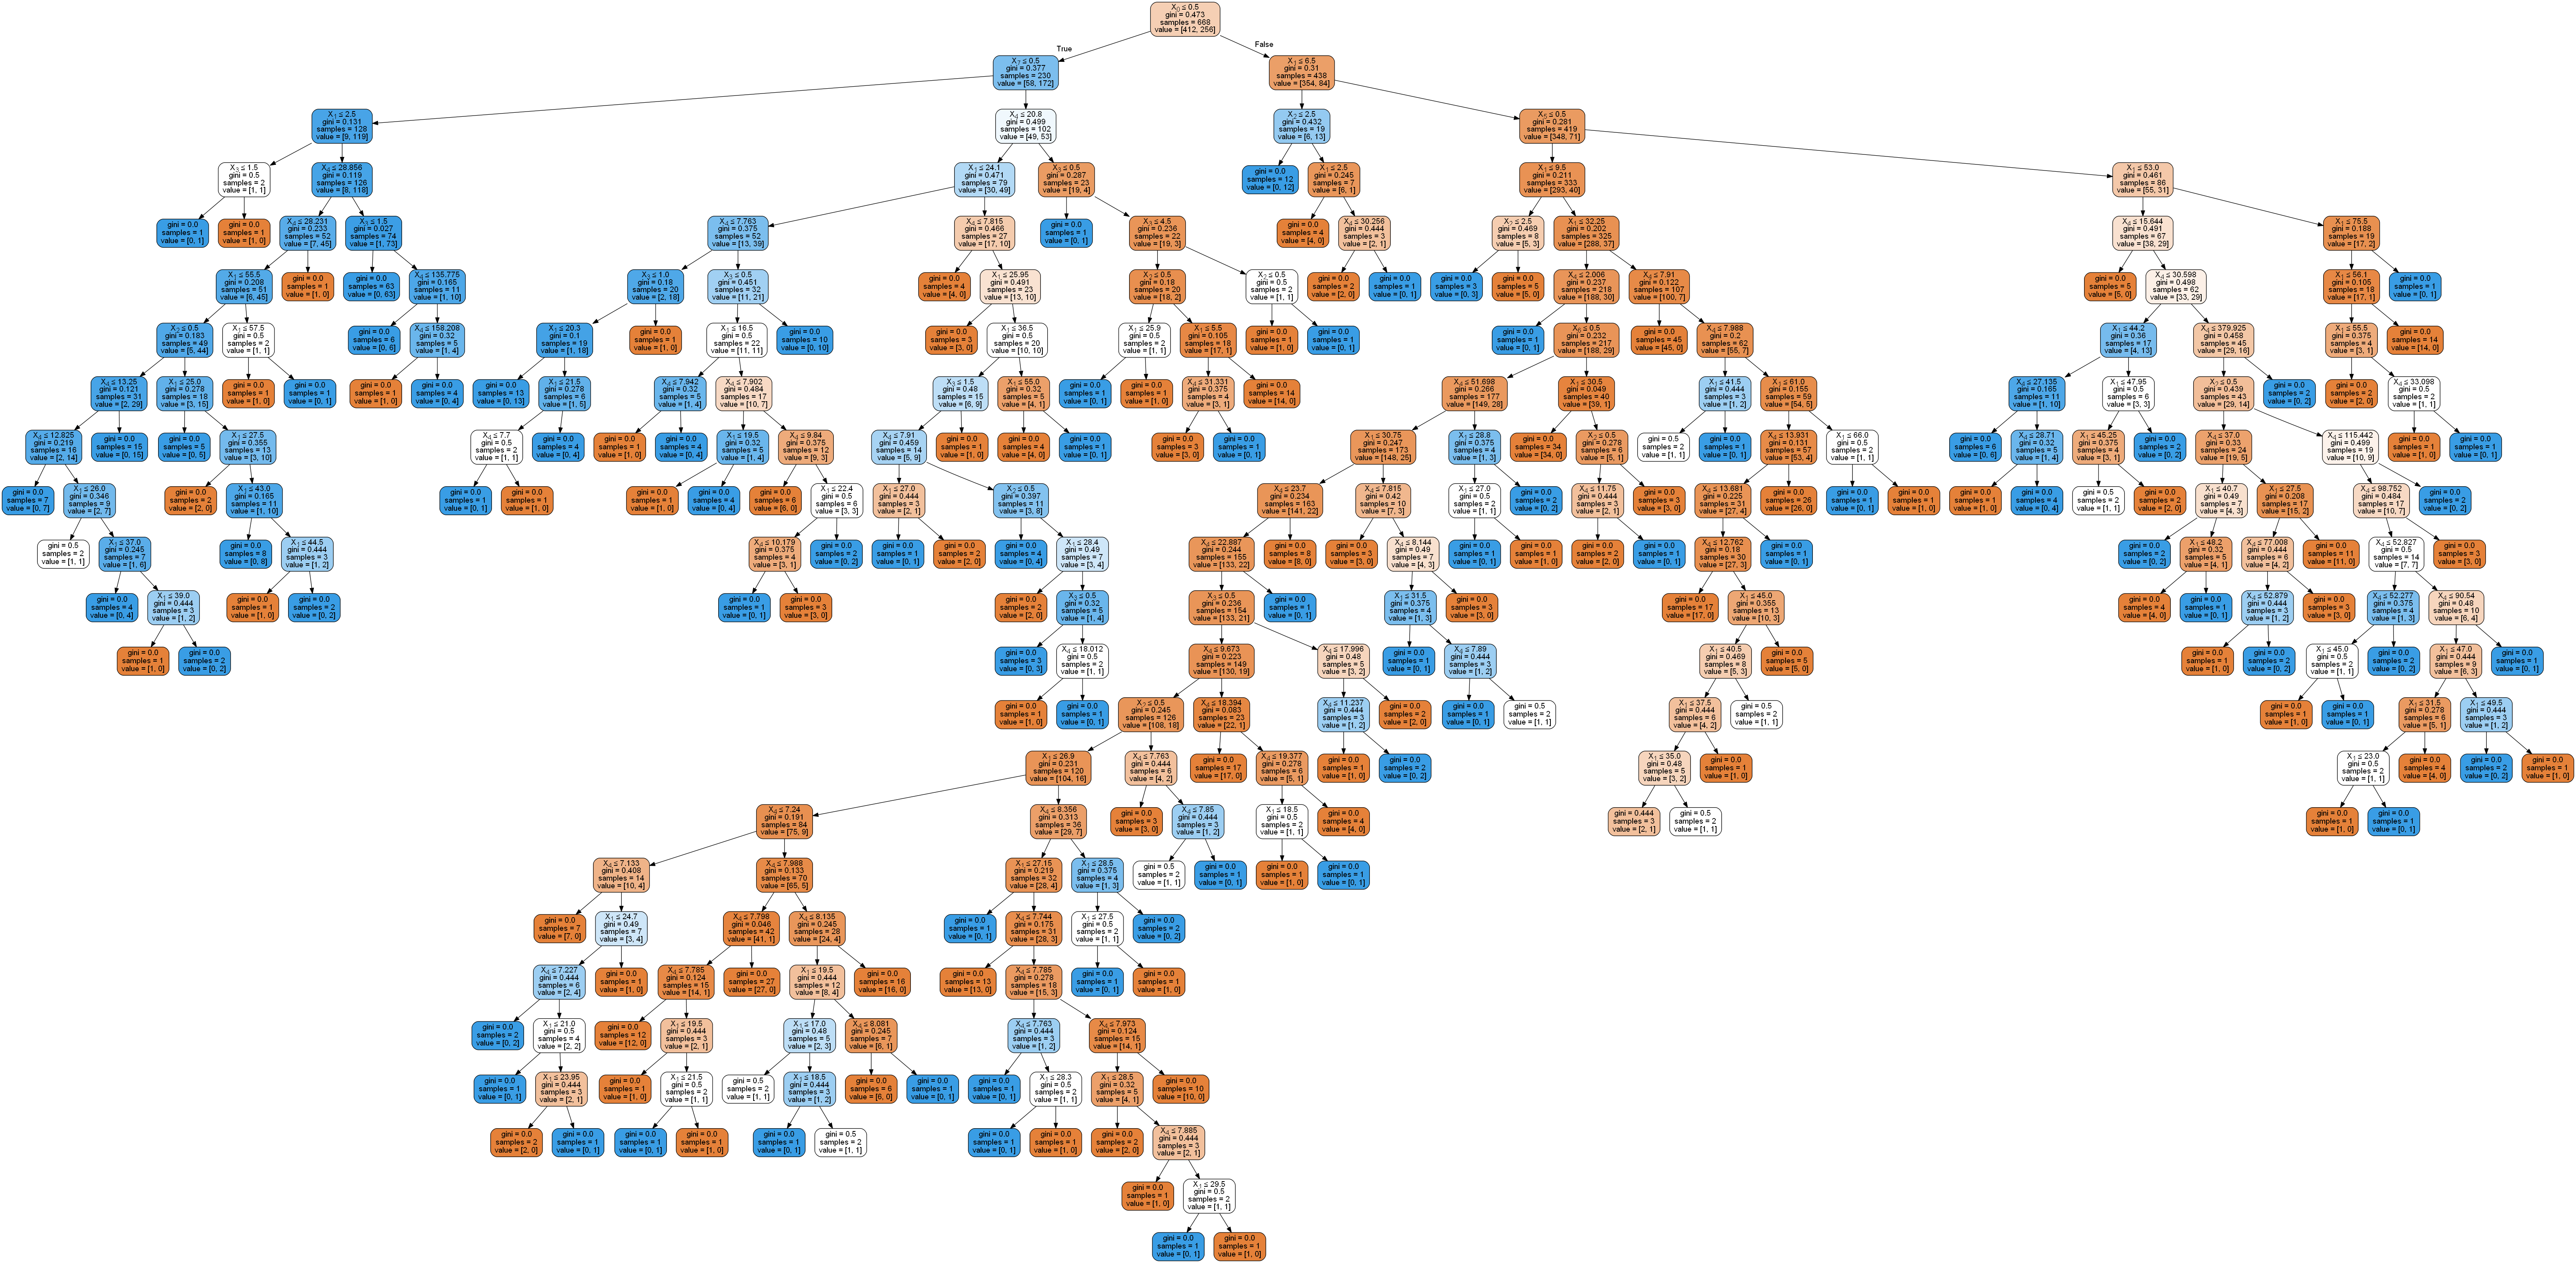

In [24]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus 
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True, special_characters=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

### Performing hyperparameter tuning with Grid search CV

In [25]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(1,10,1),
    'splitter' : ['best', 'random']
    
}


In [26]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

#### Best parameters obtained are as follows

In [28]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


#### Best model obtained is as follows

In [29]:
best_clf = grid_search.best_estimator_

In [30]:
scores = cross_val_score(best_clf,x_train,y_train, cv=5,scoring='f1_macro')
scores.mean()

0.7742895737776243

In [31]:
train_predictions = best_clf.predict(x_train)
test_predictions = best_clf.predict(x_test)

#### From the train and test scores we can see that the model has generalized well

In [32]:
f1_score(train_predictions, y_train)

0.8336842105263158

In [33]:
f1_score(test_predictions, y_test)

0.7530864197530864

### Visualizing the hyperparametertuned model

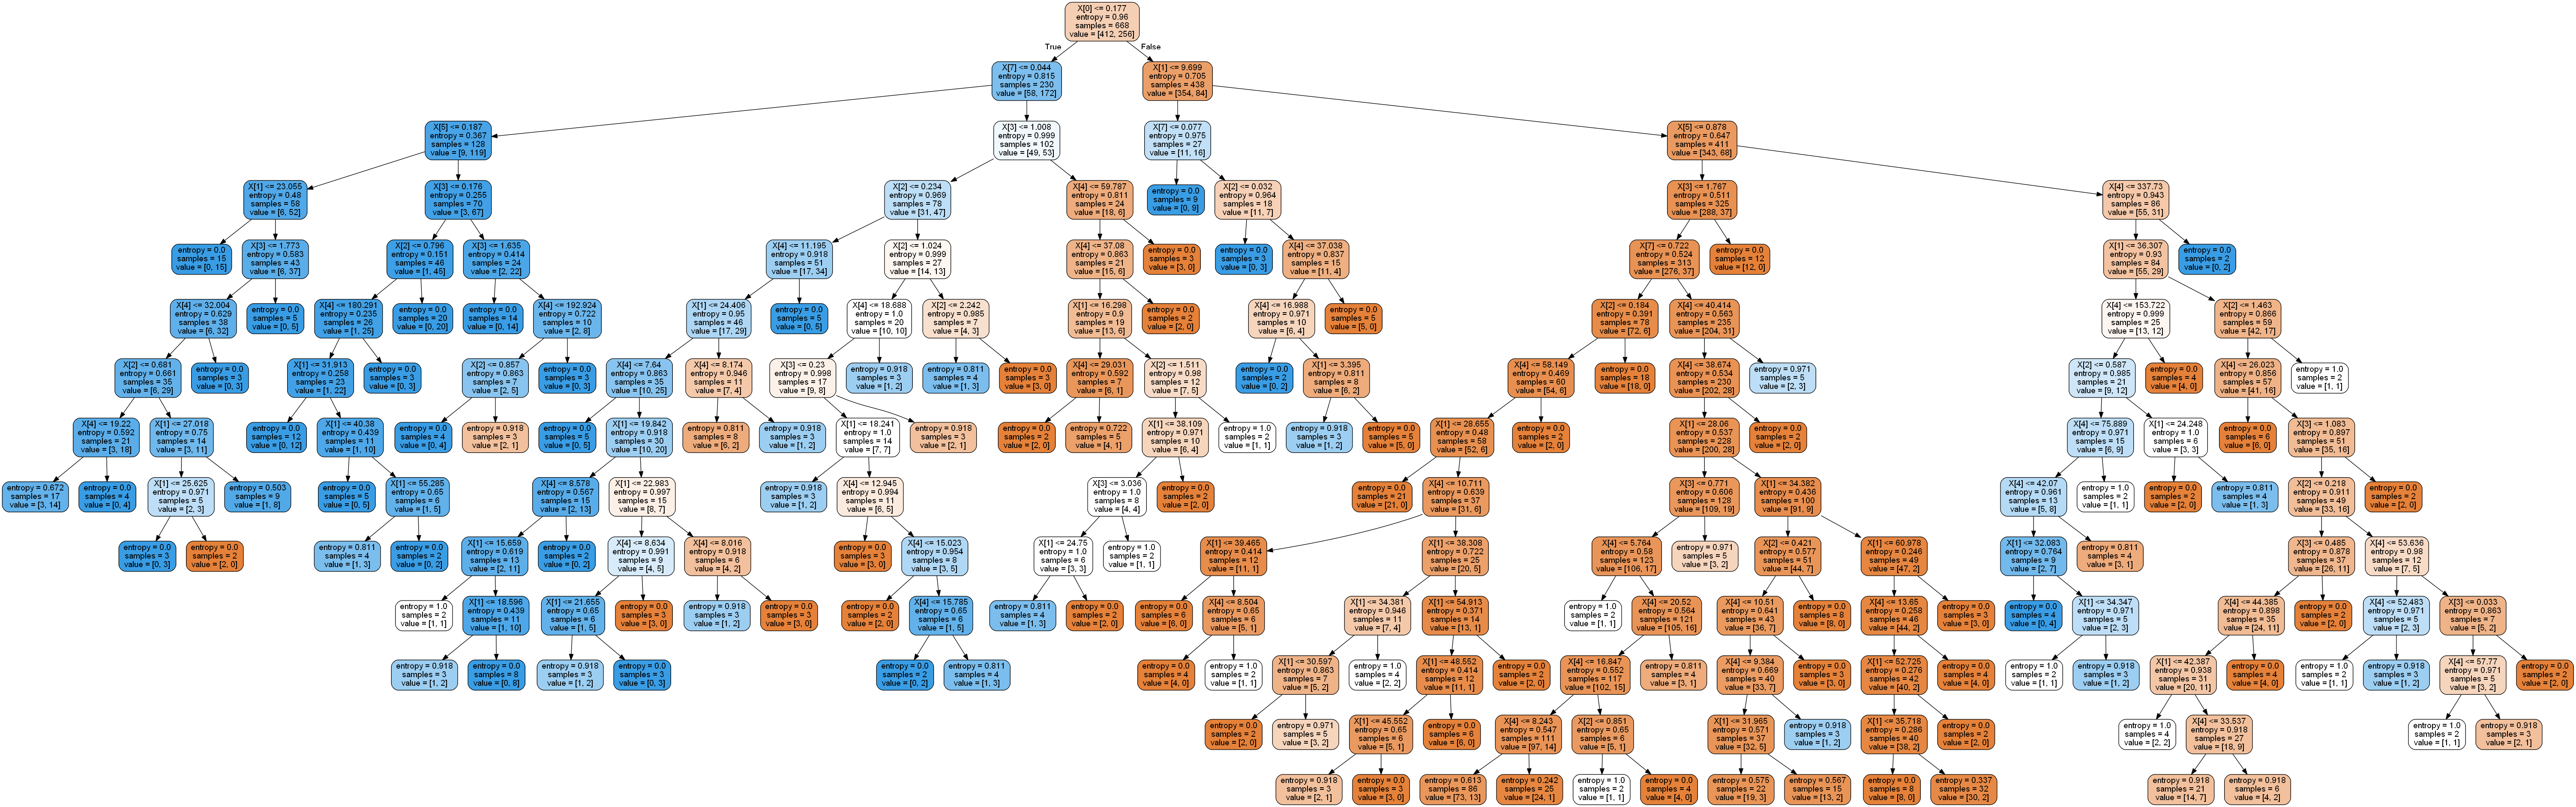

In [34]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus 
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(best_clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())